# Bank Marketing Project

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data
bm_tr=pd.read_csv("bankmarketing_train.csv")
bm_te=pd.read_csv("bankmarketing_test.csv")

In [3]:
bm_tr.keys()

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
bm_te.keys()

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [5]:
bm_tr.info

<bound method DataFrame.info of           ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    conta

In [6]:
bm_te.info

<bound method DataFrame.info of           ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
1      40403   78        retired  divorced    primary      no     2787   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
...      ...  ...            ...       ...        ...     ...      ...   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   
13563  34839   29         admin.   married  secondary      no        2   

      housing loan    contact  day month  duration  campaign  pdays  previous  

In [7]:
bm_tr.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [8]:
bm_te.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [9]:
bm_tr.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
bm_te.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [11]:
bm_tr.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# Exploratory Data Analysis

In [12]:
bm_tr.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<Axes: >

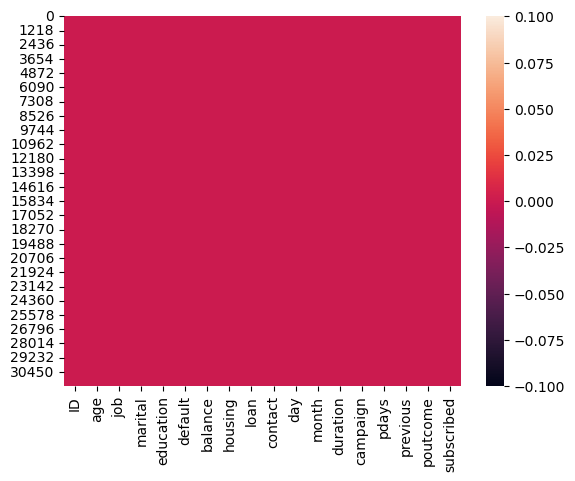

In [13]:
sns.heatmap(bm_tr.isnull())

In [14]:
bm_tr['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [15]:
bm_tr['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [16]:
bm_tr['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [17]:
bm_tr['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

In [18]:
bm_tr['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

In [19]:
bm_tr['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

In [20]:
bm_tr['contact'].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [21]:
bm_tr['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

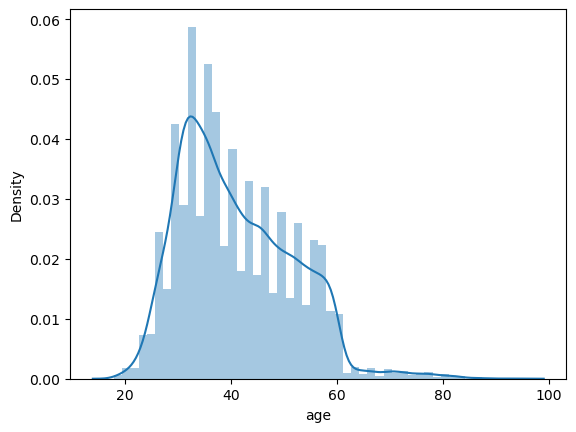

In [22]:
sns.distplot(bm_tr['age'])

<Axes: xlabel='balance', ylabel='Density'>

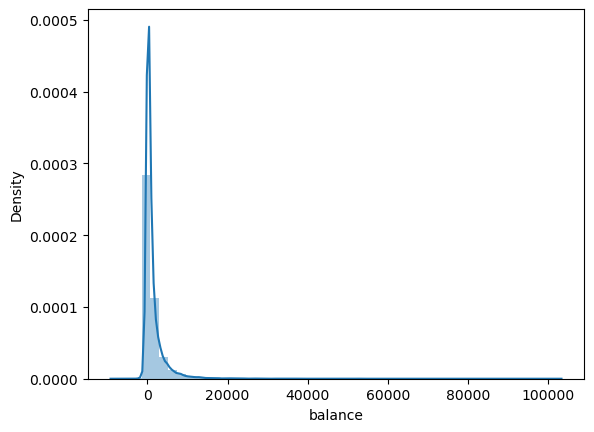

In [23]:
sns.distplot(bm_tr['balance'])

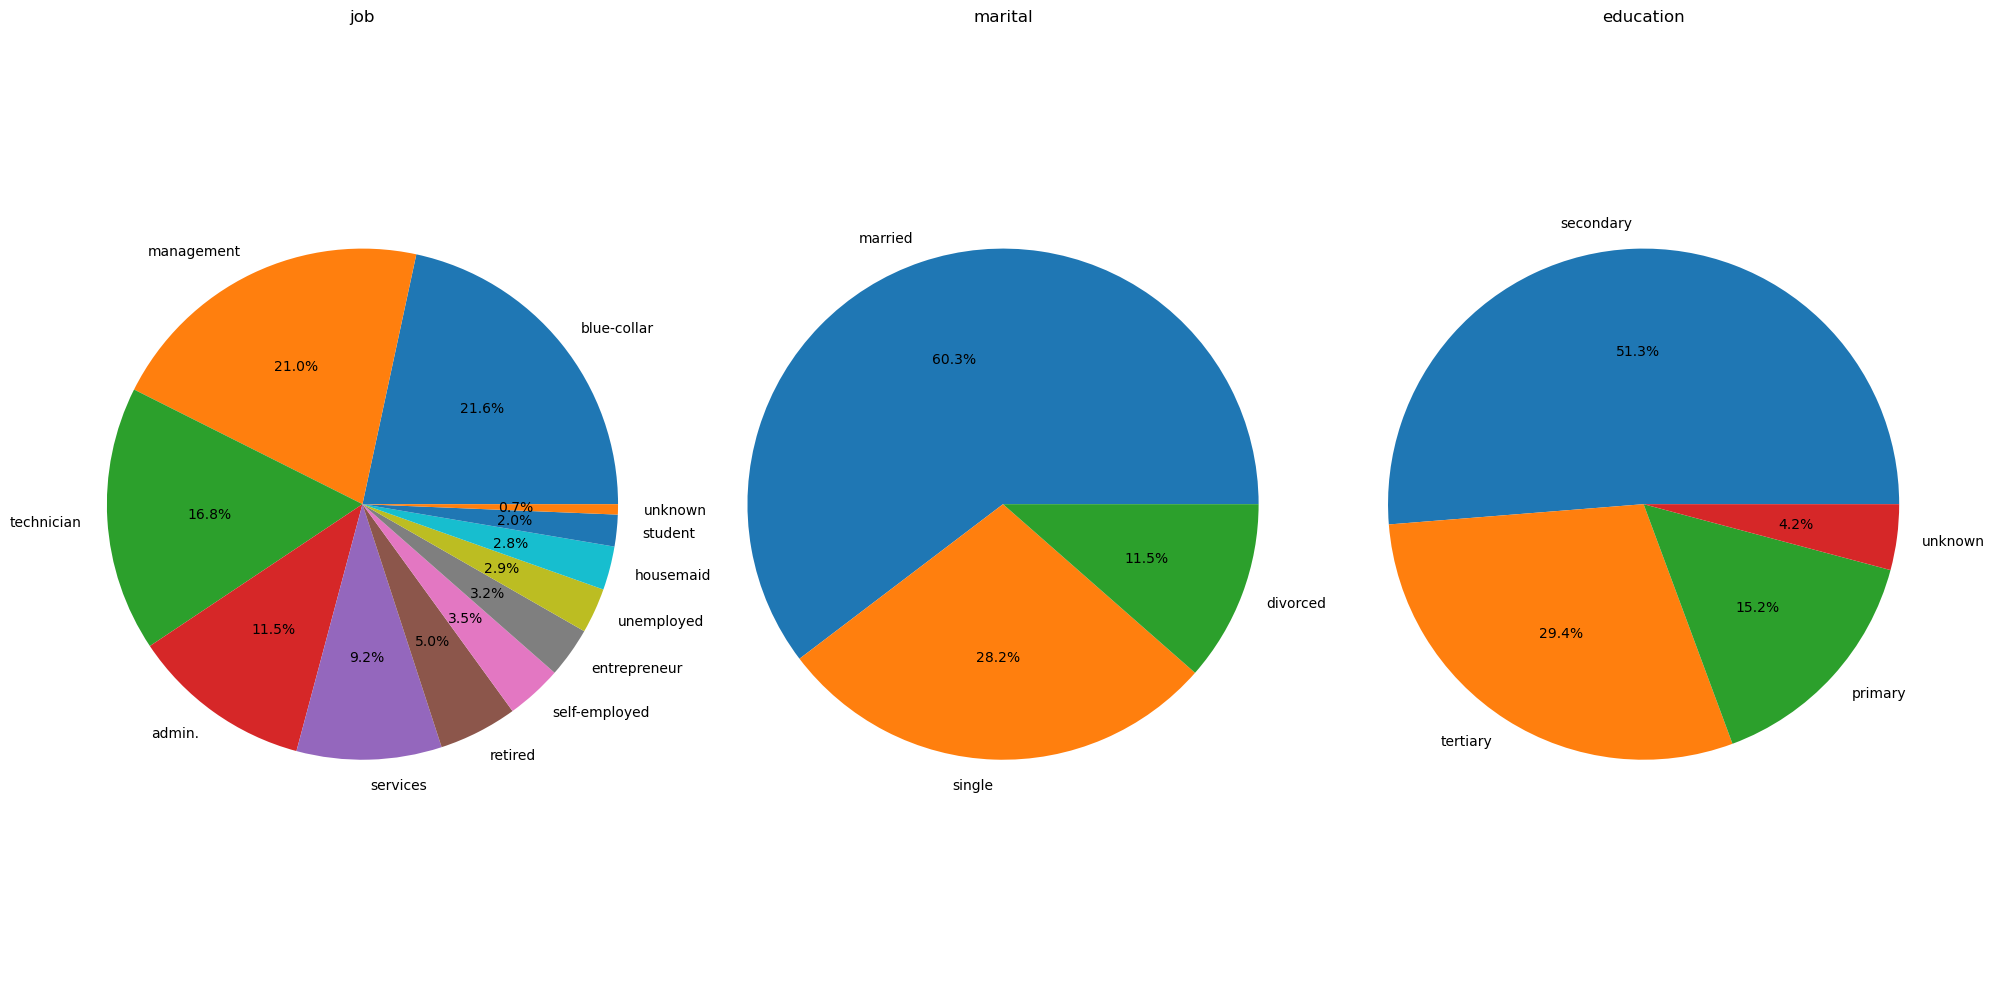

In [24]:
features = ['job', 'marital', 'education']
fig, axes = plt.subplots(1, len(features), figsize=(20, 10))

for i, col in enumerate(features):
    x = bm_tr[col].value_counts()
    axes[i].pie(x.values, labels=x.index, autopct='%1.1f%%')
    axes[i].set_title(col)
    axes[i].axis('equal')  
plt.tight_layout()
plt.show()

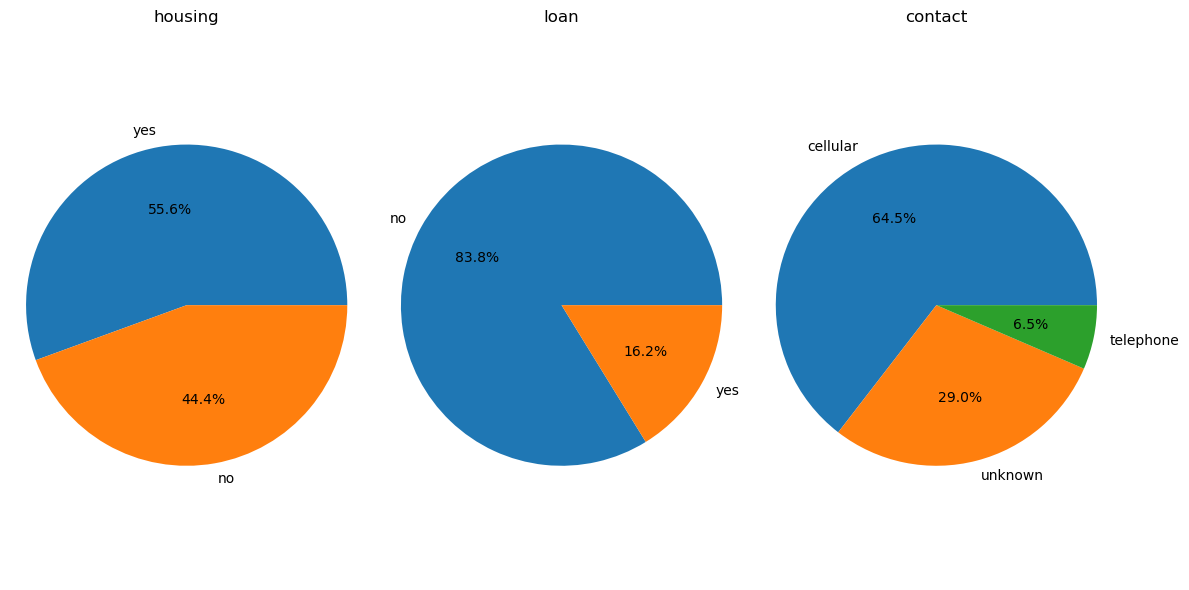

In [25]:
features = ['housing','loan','contact']
fig, axes = plt.subplots(1, len(features), figsize=(12, 6))

for i, col in enumerate(features):
    x = bm_tr[col].value_counts()
    axes[i].pie(x.values, labels=x.index, autopct='%1.1f%%')
    axes[i].set_title(col)
    axes[i].axis('equal')  
plt.tight_layout()
plt.show()

In [26]:
bm_tr.corr()

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


<Axes: >

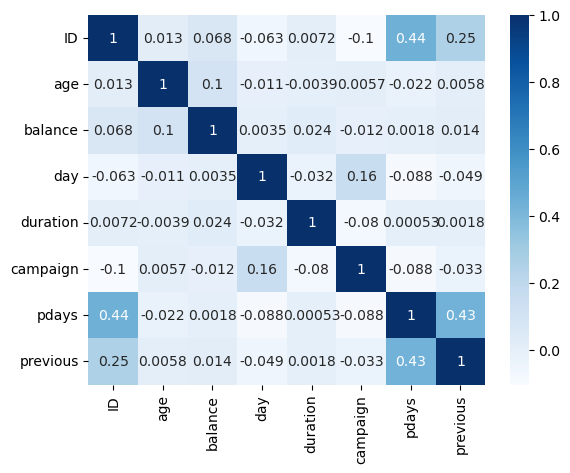

In [27]:
sns.heatmap(bm_tr.corr(),cmap='Blues',annot=True)

In [28]:
bm_te.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [29]:
bm_te.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<Axes: >

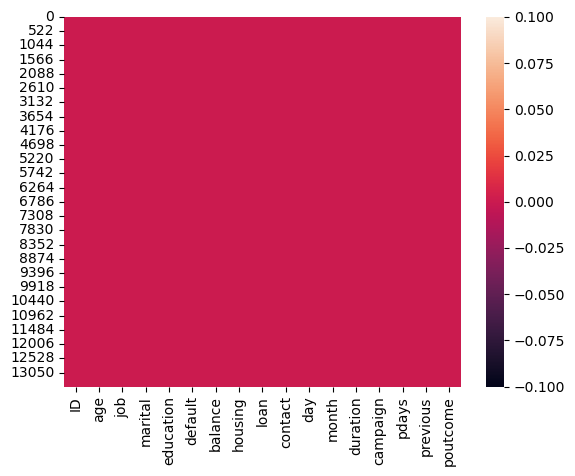

In [30]:
sns.heatmap(bm_te.isnull())

In [31]:
bm_te['job'].value_counts()

blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64

In [32]:
bm_te['marital'].value_counts()

married     8119
single      3868
divorced    1577
Name: marital, dtype: int64

In [33]:
bm_te['education'].value_counts()

secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64

In [34]:
bm_te['default'].value_counts()

no     13334
yes      230
Name: default, dtype: int64

In [35]:
bm_te['housing'].value_counts()

yes    7546
no     6018
Name: housing, dtype: int64

In [36]:
bm_te['loan'].value_counts()

no     11451
yes     2113
Name: loan, dtype: int64

In [37]:
bm_te['contact'].value_counts()

cellular     8862
unknown      3843
telephone     859
Name: contact, dtype: int64

In [38]:
job_sub = bm_tr.groupby(['job', 'subscribed']).size().unstack(fill_value=0)

print(job_sub)

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


<Axes: xlabel='job'>

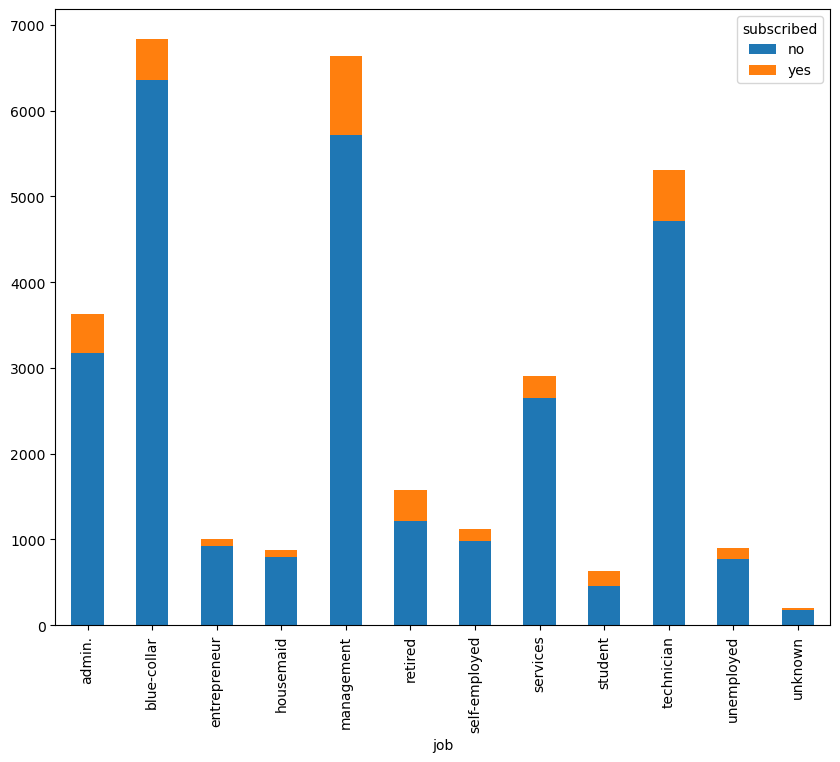

In [39]:
job_sub.plot.bar(stacked=True,figsize=(10,8))

In [40]:
mar_sub = bm_tr.groupby(['marital', 'subscribed']).size().unstack(fill_value=0)

print(mar_sub)

subscribed     no   yes
marital                
divorced     3185   445
married     17176  1919
single       7571  1351


<Axes: xlabel='marital'>

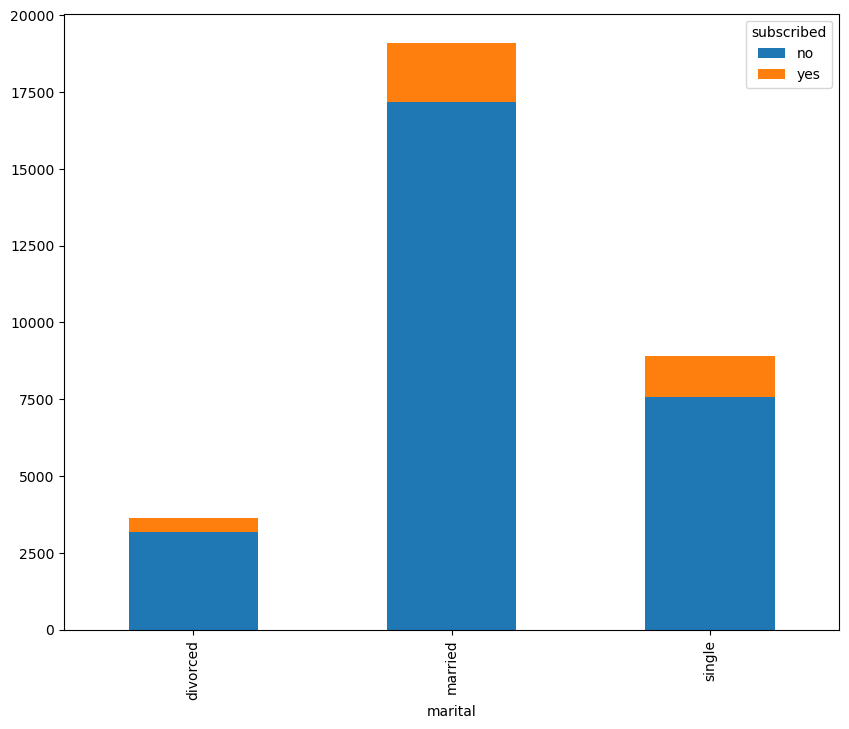

In [41]:
mar_sub.plot.bar(stacked=True,figsize=(10,8))

In [42]:
edu_sub = bm_tr.groupby(['education', 'subscribed']).size().unstack(fill_value=0)

print(edu_sub)

subscribed     no   yes
education              
primary      4381   427
secondary   14527  1697
tertiary     7886  1415
unknown      1138   176


<Axes: xlabel='education'>

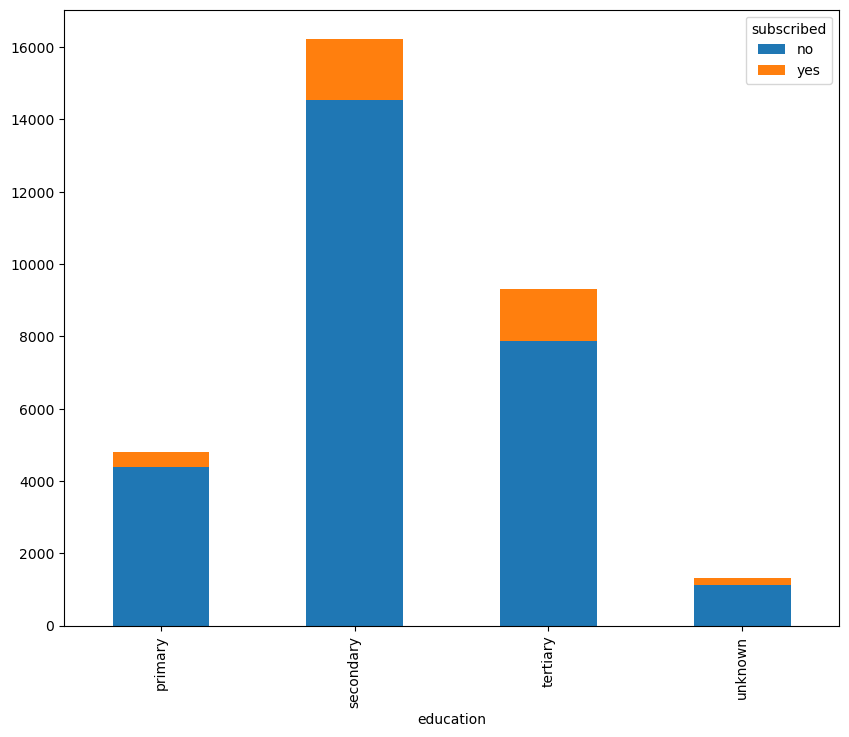

In [43]:
edu_sub.plot.bar(stacked=True,figsize=(10,8))

In [44]:
bm_tr['subscribed'] = bm_tr['subscribed'].map({'no': 0, 'yes': 1})

In [45]:
bm_tr['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder
categorical_cols=['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
le=LabelEncoder()
for i in bm_tr[categorical_cols]:
    bm_tr[i]=le.fit_transform(bm_tr[i])
bm_tr

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,19710,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,38556,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [66]:
job = pd.crosstab(bm_tr['job'],bm_tr['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

In [67]:
target = bm_tr['subscribed']
train = bm_tr.drop(columns=['subscribed'])


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings ('ignore')

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(train, target, test_size=0.2, random_state=12)

In [70]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [71]:
lm.coef_

array([ 9.63343694e-06,  3.03837605e-04,  9.65130649e-04,  6.27543358e-03,
        1.46758150e-02, -3.18788603e-03,  8.33114208e-07, -6.03802341e-02,
       -2.11445281e-02,  5.16076512e-02,  2.81874696e-04,  1.56312365e-03,
        4.99455271e-04, -1.01415375e-03,  2.01814860e-04,  1.02231496e-02,
        4.26849993e-02])

In [72]:
lm.intercept_

-0.400403535248494

In [73]:
lm.score(xtrain,ytrain)

0.27307557604821986

In [74]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [75]:
pred=lg.predict(xtest)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
accuracy_score(pred,ytest)

0.8889415481832543

In [77]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [78]:
predknn=knn.predict(xtest)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
print(accuracy_score(ytest,predknn))

0.890521327014218


In [80]:
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

In [81]:
predsv=sv.predict(xtest)
predsv

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
print(accuracy_score(ytest,predsv))

0.8859399684044234


In [83]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [84]:
preddtc=dtc.predict(xtest)
preddtc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [85]:
print(accuracy_score(ytest,preddtc))

0.8890995260663507


In [86]:
predbm_te=knn.predict(xtest)
predbm_te

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [87]:
sbm = pd.DataFrame()

In [88]:
sbm.loc[:, 'ID'] = bm_te['ID']
sbm.loc[:len(predbm_te) - 1, 'subscribed'] = predbm_te

In [89]:
sbm['subscribed']

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
13559    NaN
13560    NaN
13561    NaN
13562    NaN
13563    NaN
Name: subscribed, Length: 13564, dtype: float64

In [90]:
bm_te.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [91]:
sbm.loc[:, 'ID'] = bm_te['ID']
sbm.loc[:len(predbm_te) - 1, 'subscribed'] = predbm_te

sbm['subscribed'].fillna(0, inplace=True)

In [92]:
sbm['subscribed']

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
13559    0.0
13560    0.0
13561    0.0
13562    0.0
13563    0.0
Name: subscribed, Length: 13564, dtype: float64

In [93]:
sbm['subscribed'].replace(0,'no',inplace=True)
sbm['subscribed'].replace(1,'yes',inplace=True)

In [94]:
sbm['subscribed']

0         no
1         no
2         no
3         no
4        yes
        ... 
13559     no
13560     no
13561     no
13562     no
13563     no
Name: subscribed, Length: 13564, dtype: object